# Pandas provides DataFrames and more

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('train2.csv',sep=',')
train.shape

(100, 12)

In [3]:
test = pd.read_csv('test2.csv',sep=',')
test.shape

(50, 11)

In [2]:
train['source']='train'
test['source']='test'
df = pd.concat([train,test])
df.shape

NameError: name 'train' is not defined

In [1]:
df.head()

NameError: name 'df' is not defined

In [6]:
df.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
source                        object
dtype: object

# Data Analysis using Pandas DataFrames

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_MRP,150.0,140.605500,63.952782,32.0900,95.668600,143.62990,187.847050,265.222600
Item_Outlet_Sales,100.0,2123.395992,1581.167955,125.8362,792.801350,1837.60800,3099.299000,6768.522800
Item_Visibility,150.0,0.068658,0.057833,0.0000,0.025743,0.05783,0.101872,0.293418
Item_Weight,121.0,12.818306,4.725583,4.7850,8.750000,12.50000,17.500000,21.350000
Outlet_Establishment_Year,150.0,1997.446667,8.299379,1985.0000,1987.000000,1998.00000,2004.000000,2009.000000


In [8]:
df.isnull().sum()

Item_Fat_Content              0
Item_Identifier               0
Item_MRP                      0
Item_Outlet_Sales            50
Item_Type                     0
Item_Visibility               0
Item_Weight                  29
Outlet_Establishment_Year     0
Outlet_Identifier             0
Outlet_Location_Type          0
Outlet_Size                  41
Outlet_Type                   0
source                        0
dtype: int64

In [9]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

# DataFrames can be used like Excel Tables or SQL Queries

In [10]:
#### Display MRP, Visibility, Sales, etc. by Item Fat Content
df.groupby('Item_Fat_Content').sum()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
Item_Fat_Content,,,,,
LF,696.4926,542.6270,0.463581,87.070,11982
Low Fat,13901.1694,137869.2034,6.262374,1002.200,187830
Regular,5744.0670,61916.7368,3.269327,405.420,89806
low fat,481.4418,10583.5568,0.250944,36.225,5995
reg,267.6542,1427.4752,0.052515,20.100,4004


In [11]:
pd.pivot_table(df,values='Item_Outlet_Sales',index='Item_Fat_Content',columns='Outlet_Location_Type')

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Item_Fat_Content,,,
LF,NaN,NaN,271.313500
Low Fat,1867.981162,2768.010937,2558.299511
Regular,1685.567814,2181.160800,1536.710787
low fat,5580.735600,NaN,2501.410600
reg,1427.475200,NaN,NaN


In [12]:
pd.crosstab(df.Item_Fat_Content,df.Outlet_Location_Type)

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Item_Fat_Content,,,
LF,1,1,4
Low Fat,29,32,33
Regular,16,8,21
low fat,1,0,2
reg,1,1,0


# Fill null values first and then perform Data Visualization

In [13]:
df['Item_Weight'].isnull().sum()

29

In [14]:
mean = df['Item_Weight'].mean()
mean

12.818305785123965

In [15]:
df['Item_Weight'].fillna(mean, inplace=True)
df['Item_Weight'].isnull().sum()

0

In [16]:
df['Outlet_Size'].isnull().sum()

41

In [18]:
#Python 3 code for mode: 
#from statistics import mode
#outlet_size_mode=mode(df['Outlet_Size'])
#outlet_size_mode= outlet_size_mode
#outlet_size_mode

In [19]:
# Python 2 Code for mode
from scipy.stats import mode
outlet_size_mode=mode(df['Outlet_Size'])
outlet_size_mode= outlet_size_mode[0][0]
outlet_size_mode

C:\Anaconda2\lib\site-packages\scipy\stats\stats.py:257: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)
C:\Anaconda2\lib\site-packages\numpy\lib\arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


'Medium'

In [20]:
df['Outlet_Size'].fillna(outlet_size_mode,inplace=True)
df['Outlet_Size'].isnull().sum()

0

In [ ]:
# Select all rows whose value is 'High' in 'Outlet_Size' column
df[df['Outlet_Size'].map(lambda Outlet_Size: 'High' in Outlet_Size)]

# Python has Powerful Visualization Libraries

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

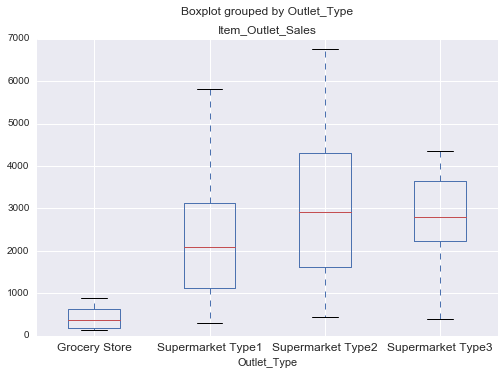

In [22]:
#### Box Plots are a powerful method to visualize Numeric Variables
df.boxplot(column='Item_Outlet_Sales',by='Outlet_Type')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x09619DD0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x09772A70>]], dtype=object)

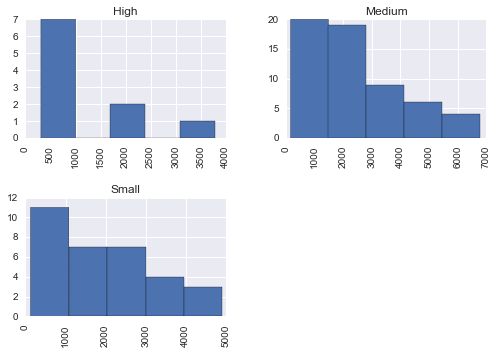

In [23]:
df.hist(column='Item_Outlet_Sales',by='Outlet_Size',bins=5)

# Seaborn can create Complex Multivariate Plots

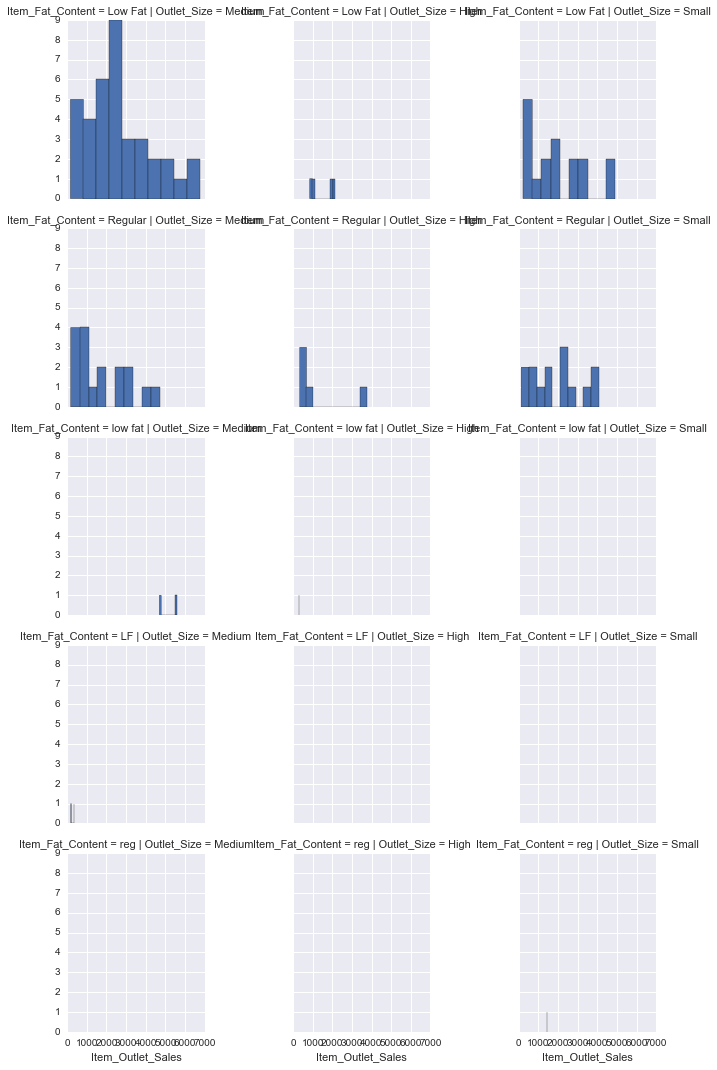

In [24]:
g = sns.FacetGrid(df,row='Item_Fat_Content',col='Outlet_Size',
                palette='Set1')
g = g.map(plt.hist,'Item_Outlet_Sales')
g = g.add_legend()

# You can Drop columns, Fill null values, and Add columns 

In [25]:
df['Age of Outlet']=2016-df['Outlet_Establishment_Year']

df.head(2)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Age of Outlet
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,17
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,7


In [26]:
df.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)

df.head(2)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Age of Outlet
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,OUT049,Tier 1,Medium,Supermarket Type1,train,17
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,OUT018,Tier 3,Medium,Supermarket Type2,train,7


# Change "Bucketing" of Variables: "Binning"

In [27]:
df['Item_Fat_Content'].value_counts()

Low Fat    94
Regular    45
LF          6
low fat     3
reg         2
Name: Item_Fat_Content, dtype: int64

In [28]:
df['Item_Fat_Content'].replace({'low fat': 'Low Fat','LF':'Low Fat','reg':'Regular'},
                               regex=True,inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    103
Regular     47
Name: Item_Fat_Content, dtype: int64

# Convert all Categorical Variables into Numeric Variables

In [29]:
from sklearn import preprocessing  ## sklern is ML library-- preprocessing 
encoding = preprocessing.LabelEncoder() ## create label encoding object

In [30]:
df['Item_Fat_Content'] = encoding.fit_transform(df['Item_Fat_Content'])

In [31]:
df['Item_Type'] = encoding.fit_transform(df['Item_Type'])

In [32]:
df['Outlet_Identifier'] = encoding.fit_transform(df['Outlet_Identifier'])

In [33]:
df['Outlet_Size'] = encoding.fit_transform(df['Outlet_Size'])

In [34]:
df['Outlet_Location_Type'] = encoding.fit_transform(df['Outlet_Location_Type'])

In [35]:
df['Outlet_Type'] = encoding.fit_transform(df['Outlet_Type'])

In [36]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Age of Outlet
0,0,FDA15,249.8092,3735.1380,4,0.016047,9.30,9,0,1,1,train,17
1,1,DRC01,48.2692,443.4228,14,0.019278,5.92,3,2,1,2,train,7
2,0,FDN15,141.6180,2097.2700,10,0.016760,17.50,9,0,1,1,train,17
3,1,FDX07,182.0950,732.3800,6,0.000000,19.20,0,2,1,0,train,18
4,0,NCD19,53.8614,994.7052,9,0.000000,8.93,1,2,0,1,train,29


# Congratulations!! You are now ready for Predictive Modeling